In [574]:
'''
Created by Omar Padierna "Para11ax" on Jan 1 2019

 This program is free software: you can redistribute it and/or modify
 it under the terms of the GNU General Public License as published by
 the Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 This program is distributed in the hope that it will be useful,
 but WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 GNU General Public License for more details.

'''

import cv2
import numpy as np 
import glob
from tqdm import tqdm
import PIL.ExifTags
import PIL.Image
from matplotlib import pyplot as plt 

#=====================================
# Function declarations
#=====================================

#Function to create point cloud file
def create_output(vertices, colors, filename):
	colors = colors.reshape(-1,3)
	vertices = np.hstack([vertices.reshape(-1,3),colors])

	ply_header = '''ply
		format ascii 1.0
		element vertex %(vert_num)d
		property float x
		property float y
		property float z
		property uchar red
		property uchar green
		property uchar blue
		end_header
		'''
	with open(filename, 'w') as f:
		f.write(ply_header %dict(vert_num=len(vertices)))
		np.savetxt(f,vertices,'%f %f %f %d %d %d')

#Function that Downsamples image x number (reduce_factor) of times. 
def downsample_image(image, reduce_factor):
	for i in range(0,reduce_factor):
		#Check if image is color or grayscale
		if len(image.shape) > 2:
			row,col = image.shape[:2]
		else:
			row,col = image.shape

		image = cv2.pyrDown(image, dstsize= (col//2, row // 2))
	return image

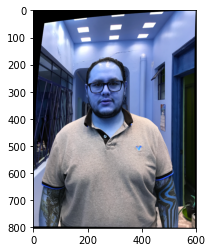

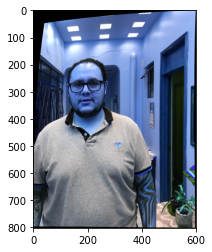

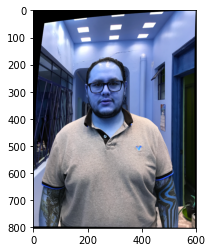

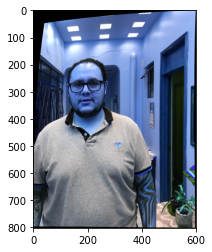

In [575]:
#=========================================================
# Stereo 3D reconstruction 
#=========================================================

#Load camera parameters
ret = np.load('./camera_params/ret.npy')
K = np.load('./camera_params/K.npy')
dist = np.load('./camera_params/dist.npy')

#Specify image paths
img_path1 = './reconstruct_this/left.png'
img_path2 = './reconstruct_this/right.png'
# print(img_path1)

#Load pictures
img_1 = cv2.imread(img_path1)
img_2 = cv2.imread(img_path2)

# Get height and width. Note: It assumes that both pictures are the same size. They HAVE to be same size and height. 
h,w = img_2.shape[:2]

#Get optimal camera matrix for better undistortion 
new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(K,dist,(w,h),1,(w,h))

#Undistort images
img_1_undistorted = cv2.undistort(img_1, K, dist, None, new_camera_matrix)
img_2_undistorted = cv2.undistort(img_2, K, dist, None, new_camera_matrix)

plt.imshow(img_1_undistorted)
plt.show()
plt.imshow(img_2_undistorted)
plt.show()

#Downsample each image 3 times (because they're too big)
# img_1_downsampled = downsample_image(img_1_undistorted,3)
# img_2_downsampled = downsample_image(img_2_undistorted,3)

img_1_downsampled = img_1_undistorted
img_2_downsampled = img_2_undistorted

#cv2.imwrite('undistorted_left.jpg', img_1_downsampled)
#cv2.imwrite('undistorted_right.jpg', img_2_downsampled)
plt.imshow(img_1_downsampled)
plt.show()
plt.imshow(img_2_downsampled)
plt.show()

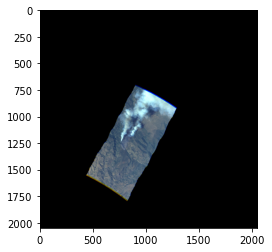

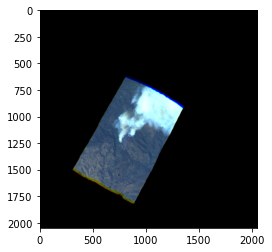

In [588]:
#Specify image paths
img_path1 = './reconstruct_this2/center.png'
img_path2 = './reconstruct_this2/right.png'

img_1_downsampled = cv2.imread(img_path1)
img_2_downsampled = cv2.imread(img_path2)

img_1_downsampled = downsample_image(img_1_downsampled,1)
img_2_downsampled = downsample_image(img_2_downsampled,1)

plt.imshow(img_1_downsampled)
plt.show()
plt.imshow(img_2_downsampled)
plt.show()

In [580]:
# img_1_downsampled = downsample_image(img_1_downsampled,3)
# img_2_downsampled = downsample_image(img_2_downsampled,3)

In [581]:
# # grab the dimensions of the image and calculate the center of the
# # image

# rotate_angle = -20

# (h, w) = img_1_downsampled.shape[:2]
# (cX, cY) = (w // 2, h // 2)
# # rotate our image by 45 degrees around the center of the image
# M = cv2.getRotationMatrix2D((cX, cY), rotate_angle, 1.0)

# rotated_img_1_downsampled = cv2.warpAffine(img_1_downsampled, M, (w, h))
# rotated_img_2_downsampled = cv2.warpAffine(img_2_downsampled, M, (w, h))
# print(h,w)

# plt.imshow(rotated_img_1_downsampled)
# plt.show()
# plt.imshow(rotated_img_2_downsampled)
# plt.show()

# top = 470
# botton = 800
# left = 230
# right = 700
# cropped_rotated_img_1_downsampled = rotated_img_1_downsampled[top:botton, left:right]
# cropped_rotated_img_2_downsampled = rotated_img_2_downsampled[top:botton, left:right]

# # cropped_rotated_img_1_downsampled = img_1_downsampled[top:botton, left:right]
# # cropped_rotated_img_2_downsampled = img_2_downsampled[top:botton, left:right]

# plt.imshow(cropped_rotated_img_1_downsampled)
# plt.show()
# plt.imshow(cropped_rotated_img_2_downsampled)
# plt.show()

2048 2048


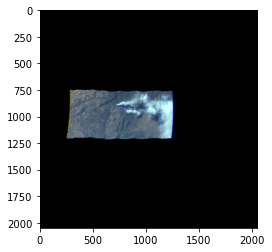

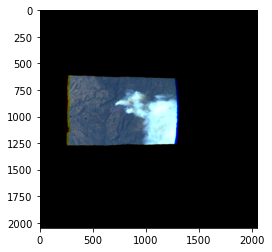

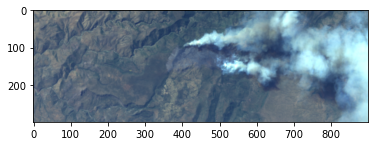

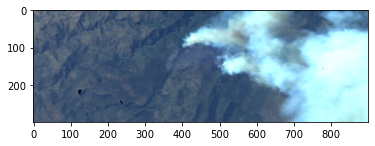

In [592]:
# grab the dimensions of the image and calculate the center of the
# image

rotate_angle = -62

(h, w) = img_1_downsampled.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), rotate_angle, 1.0)

rotated_img_1_downsampled = cv2.warpAffine(img_1_downsampled, M, (w, h))
rotated_img_2_downsampled = cv2.warpAffine(img_2_downsampled, M, (w, h))
print(h,w)

plt.imshow(rotated_img_1_downsampled)
plt.show()
plt.imshow(rotated_img_2_downsampled)
plt.show()

top = 800
botton = 1100
left = 300
right = 1200
cropped_rotated_img_1_downsampled = rotated_img_1_downsampled[top:botton, left:right]
cropped_rotated_img_2_downsampled = rotated_img_2_downsampled[top:botton, left:right]

# cropped_rotated_img_1_downsampled = img_1_downsampled[top:botton, left:right]
# cropped_rotated_img_2_downsampled = img_2_downsampled[top:botton, left:right]

plt.imshow(cropped_rotated_img_1_downsampled)
plt.show()
plt.imshow(cropped_rotated_img_2_downsampled)
plt.show()

In [593]:
img_1_downsampled = cropped_rotated_img_1_downsampled
img_2_downsampled = cropped_rotated_img_2_downsampled

In [594]:
np.shape(img_1_downsampled)

(300, 900, 3)

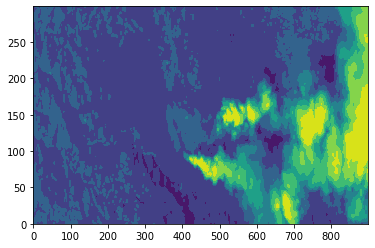

In [595]:
plt.contourf(img_1_downsampled[:,:,2])

In [596]:
# # Sharp Image
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# img_1_downsampled = cv2.filter2D(img_1_downsampled, -1, kernel)
# img_2_downsampled = cv2.filter2D(img_2_downsampled, -1, kernel)
# plt.imshow(img_1_downsampled)
# plt.show()
# plt.imshow(img_2_downsampled)
# plt.show()


Computing the disparity  map...


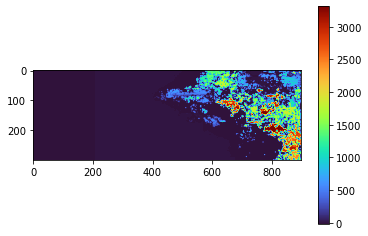

3312


In [597]:
#Set disparity parameters
#Note: disparity range is tuned according to specific parameters obtained through trial and error. 
win_size = 3
min_disp = 0
max_disp = 16*13

num_disp = max_disp - min_disp # Needs to be divisible by 16

#Create Block matching object. 
stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
	numDisparities = num_disp,
	blockSize = 1,
	uniquenessRatio = 5,
	speckleWindowSize = 0,
	speckleRange = 2,
	disp12MaxDiff = -1,
	P1 = 8*3*win_size**2,#8*3*win_size**2,
	P2 =32*3*win_size**2, #32*3*win_size**2
                              )

#Compute disparity map
print ("\nComputing the disparity  map...")
disparity_map = stereo.compute(img_1_downsampled, img_2_downsampled)

#Show disparity map before generating 3D cloud to verify that point cloud will be usable. 
plt.imshow(disparity_map,'turbo')
plt.colorbar()
plt.savefig("disparitymap.png")
plt.show()
print(np.max(disparity_map))

In [598]:
#Generate  point cloud. 
print ("\nGenerating the 3D map...")

#Get new downsampled width and height 
h,w = img_2_downsampled.shape[:2]

#Load focal length. 
# focal_length = np.load('./camera_params/FocalLength.npy')
focal_length = 29


# #Perspective transformation matrix
# #This transformation matrix is from the openCV documentation, didn't seem to work for me. 
# Q1 = np.float32([[1,0,0,-w/2.0],
# 				[0,-1,0,h/2.0],
# 				[0,0,0,-focal_length],
# 				[0,0,1,0]])

#This transformation matrix is derived from Prof. Didier Stricker's power point presentation on computer vision. 
#Link : https://ags.cs.uni-kl.de/fileadmin/inf_ags/3dcv-ws14-15/3DCV_lec01_camera.pdf
Q2 = np.float32([[1,0,0,0],
				[0,-1,0,0],
				[0,0,focal_length*0.05,0], #Focal length multiplication obtained experimentally. 
				[0,0,0,1]])

#Reproject points into 3D
points_3D = cv2.reprojectImageTo3D(disparity_map, Q2)
#Get color points
colors = cv2.cvtColor(img_2_downsampled, cv2.COLOR_BGR2RGB)

#Get rid of points with value 0 (i.e no depth)
mask_map = disparity_map > disparity_map.min()

#Mask colors and points. 
output_points = points_3D[mask_map]
output_colors = colors[mask_map]

#Define name for output file
output_file = 'reconstructed.ply'

#Generate point cloud 
print ("\n Creating the output file... \n")
create_output(output_points, output_colors, output_file)


Generating the 3D map...

 Creating the output file... 



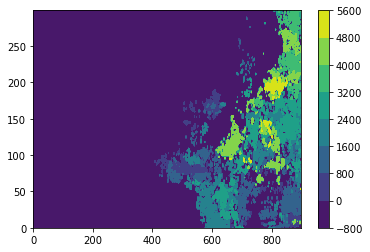

In [599]:
plt.contourf(points_3D[:,:,2])
plt.colorbar()

In [172]:
np.shape(points_3D)

(500, 950, 3)